In [109]:
# Imports
import numpy as np
import pandas as pd
from logr_model import logistic_regression_predict
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Read the data
data = pd.read_csv('data/glass.csv')

print(data.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Glass_Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           1


In [113]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Perform stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

Accuracy (scikit-learn): 0.7037037037037037
Precision (macro) (scikit-learn): 0.6120915032679739
Recall (macro) (scikit-learn): 0.6515594541910331


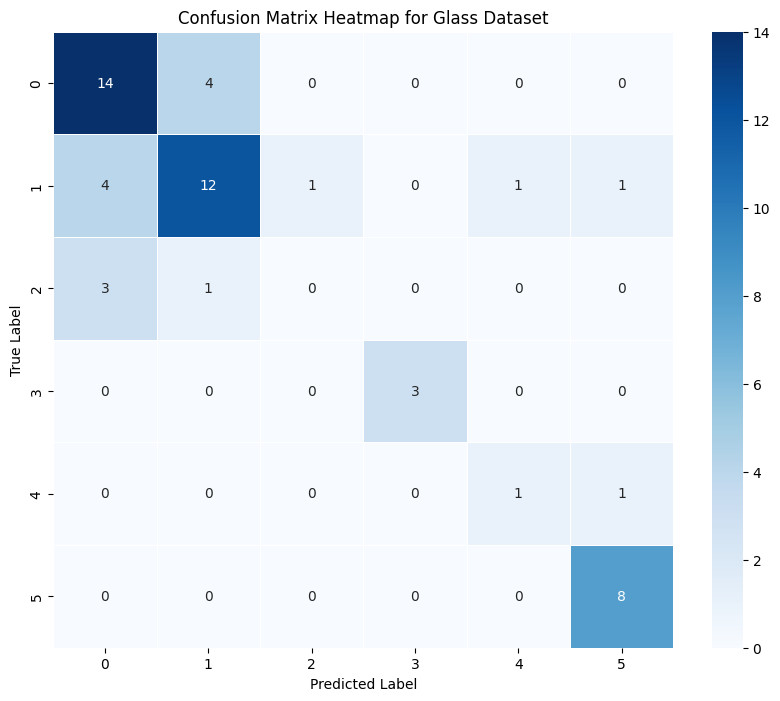

In [114]:
model = LogisticRegression(max_iter=10000, solver='lbfgs')

model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)

# Print out evaluation metrics
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy (scikit-learn):", accuracy_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='macro')
print("Precision (macro) (scikit-learn):", precision_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='macro')
print("Recall (macro) (scikit-learn):", recall_sklearn)
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_sklearn, annot=True, cmap='Blues', fmt='g', cbar=True, linewidths=0.5)
plt.title('Confusion Matrix Heatmap for Glass Dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()